# ASSIGNMENT 2

In [1]:
# Import semua package untuk perhitungan statistik Python

import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
nyc=pd.read_csv('nyc-rolling-sales.csv')
nyc

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [3]:
nyc.info

<bound method DataFrame.info of        Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0               4        1  ALPHABET CITY   
1               5        1  ALPHABET CITY   
2               6        1  ALPHABET CITY   
3               7        1  ALPHABET CITY   
4               8        1  ALPHABET CITY   
...           ...      ...            ...   
84543        8409        5        WOODROW   
84544        8410        5        WOODROW   
84545        8411        5        WOODROW   
84546        8412        5        WOODROW   
84547        8413        5        WOODROW   

                           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0      07 RENTALS - WALKUP APARTMENTS                                2A   
1      07 RENTALS - WALKUP APARTMENTS                                 2   
2      07 RENTALS - WALKUP APARTMENTS                                 2   
3      07 RENTALS - WALKUP APARTMENTS                                2B   
4      07 RENTALS - WALKUP APARTMENTS               

---------------------------

### Rumusan Masalah

1. Apakah ada perbedaan unit yang terjual antara bangunan 07 Rentals - Walkup Apartments dengan 08 Rentals - Elevator Apartments di Kota Manhattan

### Hipotesis

Ha = Ada perbedaan unit yang terjual antara tahun 2014 dengan tahun 2015 di Kota Brooklyn

Ho = Tidak ada perbedaan unit yang terjual antara tahun 2014 dan tahun 2015 di Kota Brooklyn

----------------------------

### Penyelesaian

Dalam menjawab hipotesis diatas akan digunakan uji statistik. Rumus uji statistik yang digunakan ditentukan oleh hasil uji prasyarat, yaitu uji normalitas dan uji homogenitas.

Dengan demikian akan dilakukan uji normalitas dan homogentitas terlebih dahulu

-----------------------

#### Langkah-Langkah Penyelesaian

1. Mensortir data yang dibutuhkan dari database
2. Menghitung normalitas dan homogenitas dari data unit yang terjual
3. Uji hipotesis menggunakan persamaan uji statistik

-----------------------

## 1. Sortir data yang dibutuhkan dari database

In [4]:
# Info penjualan untuk kota Brooklyn
# Brooklyn memiliki kode borouh=3

brooklyn=nyc[nyc['BOROUGH']==3]
brooklyn

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
25355,4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,157,,A5,36 BAY 10TH STREET,...,1,0,1,1547,1428,1930,1,A5,800000,2017-02-27 00:00:00
25356,5,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6361,20,,A5,47 BAY 10TH STREET,...,1,0,1,1933,1660,1930,1,A5,0,2017-03-04 00:00:00
25357,6,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6364,2,,A5,1649 BENSON AVENUE,...,1,0,1,1638,972,1930,1,A5,0,2016-10-06 00:00:00
25358,7,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6367,42,,S1,1730 86TH STREET,...,1,1,2,1342,1920,1926,1,S1,1200000,2017-03-31 00:00:00
25359,8,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6374,67,,S1,8642 20TH AVENUE,...,1,1,2,1740,3240,1925,1,S1,1090000,2016-10-24 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49397,24046,3,WYCKOFF HEIGHTS,41 TAX CLASS 4 - OTHER,4,3189,1,,Z9,35 WYCKOFF AVENUE,...,0,0,0,2431,0,0,4,Z9,5650000,2017-05-04 00:00:00
49398,24047,3,WYCKOFF HEIGHTS,41 TAX CLASS 4 - OTHER,4,3189,2,,Z9,33 WYCKOFF AVENUE,...,0,0,0,2415,0,0,4,Z9,0,2017-05-04 00:00:00
49399,24048,3,WYCKOFF HEIGHTS,41 TAX CLASS 4 - OTHER,4,3189,3,,Z9,33A WYCKOFF AVENUE,...,0,0,0,2390,0,0,4,Z9,0,2017-05-04 00:00:00
49400,24049,3,WYCKOFF HEIGHTS,41 TAX CLASS 4 - OTHER,4,3280,50,,Z9,383 HARMAN STREET,...,0,0,0,2765,0,0,4,Z9,2825000,2017-03-28 00:00:00


In [5]:
# penjualan di mahattan tahun 2014

brooklyn_2014=brooklyn[brooklyn['YEAR BUILT']==2014]
brooklyn_2014

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
25503,152,3,BATH BEACH,03 THREE FAMILY DWELLINGS,1,6379,12,,C0,71 BAY 28TH STREET,...,3,0,3,2900,7242,2014,1,C0,1616981,2016-11-10 00:00:00
25504,153,3,BATH BEACH,03 THREE FAMILY DWELLINGS,1,6379,14,,C0,67 BAY 28TH STREET,...,3,0,3,2900,0,2014,1,C0,1596616,2016-10-25 00:00:00
25541,190,3,BATH BEACH,04 TAX CLASS 1 CONDOS,1A,6378,1105,,R3,68 BAY 28TH STREET,...,1,0,1,0,0,2014,1,R3,650000,2016-11-07 00:00:00
26745,1394,3,BEDFORD STUYVESANT,02 TWO FAMILY DWELLINGS,1,1703,67,,B1,799 HERKIMER STREET,...,2,0,2,1667,3316,2014,1,B1,1225000,2017-05-02 00:00:00
26746,1395,3,BEDFORD STUYVESANT,02 TWO FAMILY DWELLINGS,1,1703,67,,B1,799 HERKIMER STREET,...,2,0,2,1667,3316,2014,1,B1,0,2017-05-02 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49069,23718,3,WILLIAMSBURG-SOUTH,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,2406,1204,,R1,164 SOUTH 1ST STREET,...,1,0,1,0,0,2014,2,R1,0,2017-02-09 00:00:00
49070,23719,3,WILLIAMSBURG-SOUTH,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,2406,1205,,R1,164 SOUTH 1ST STREET,...,1,0,1,0,0,2014,2,R1,0,2017-02-09 00:00:00
49071,23720,3,WILLIAMSBURG-SOUTH,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,2406,1206,,R1,164 SOUTH 1ST STREET,...,1,0,1,0,0,2014,2,R1,0,2017-02-07 00:00:00
49072,23721,3,WILLIAMSBURG-SOUTH,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,2406,1207,,R1,164 SOUTH 1ST STREET,...,1,0,1,0,0,2014,2,R1,0,2017-02-07 00:00:00


In [6]:
# menampilkan data penting dari manhatta_2014

brooklyn2014=brooklyn_2014[['BOROUGH','BUILDING CLASS CATEGORY','TOTAL UNITS','YEAR BUILT']]
brooklyn2014

,BOROUGH,BUILDING CLASS CATEGORY,TOTAL UNITS,YEAR BUILT
25503,3,03 THREE FAMILY DWELLINGS,3,2014
25504,3,03 THREE FAMILY DWELLINGS,3,2014
25541,3,04 TAX CLASS 1 CONDOS,1,2014
26745,3,02 TWO FAMILY DWELLINGS,2,2014
26746,3,02 TWO FAMILY DWELLINGS,2,2014
...,...,...,...,...
49069,3,15 CONDOS - 2-10 UNIT RESIDENTIAL,1,2014
49070,3,15 CONDOS - 2-10 UNIT RESIDENTIAL,1,2014
49071,3,15 CONDOS - 2-10 UNIT RESIDENTIAL,1,2014
49072,3,15 CONDOS - 2-10 UNIT RESIDENTIAL,1,2014


In [7]:
# penjualan di mahattan tahun 2015

brooklyn_2015=brooklyn[brooklyn['YEAR BUILT']==2015]
brooklyn_2015

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
25521,170,3,BATH BEACH,03 THREE FAMILY DWELLINGS,1,6435,13,,C0,207 BAY 17TH STREET,...,3,0,3,1938,0,2015,1,C0,1476462,2017-03-21 00:00:00
25540,189,3,BATH BEACH,04 TAX CLASS 1 CONDOS,1A,6377,1008,,R3,33 BAY 26TH STREET,...,1,0,1,0,0,2015,1,R3,529490,2016-09-29 00:00:00
26929,1578,3,BEDFORD STUYVESANT,02 TWO FAMILY DWELLINGS,1,1839,58,,B1,203 HALSEY STREET,...,2,0,2,1875,3778,2015,1,B1,2495000,2016-11-15 00:00:00
27255,1904,3,BEDFORD STUYVESANT,04 TAX CLASS 1 CONDOS,1C,1830,1201,,R6,385 JEFFERSON AVENUE,...,1,0,1,0,0,2015,1,R6,999000,2017-07-13 00:00:00
27256,1905,3,BEDFORD STUYVESANT,04 TAX CLASS 1 CONDOS,1C,1830,1202,,R6,385 JEFFERSON AVENUE,...,1,0,1,0,0,2015,1,R6,1130220,2017-04-27 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48174,22823,3,WILLIAMSBURG-EAST,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,3043,1708,,R1,139 MESEROLE STREET,...,1,0,1,0,0,2015,2,R1,826200,2016-11-02 00:00:00
48314,22963,3,WILLIAMSBURG-NORTH,08 RENTALS - ELEVATOR APARTMENTS,2,2371,21,,D6,500 METROPOLITAN AVENUE,...,14,1,15,57936,158698,2015,2,D6,0,2016-11-23 00:00:00
48692,23341,3,WILLIAMSBURG-SOUTH,01 ONE FAMILY DWELLINGS,1,2428,29,,A5,2 WYTHE AVENUE,...,1,0,1,1250,4470,2015,1,A5,1955040,2016-09-14 00:00:00
48693,23342,3,WILLIAMSBURG-SOUTH,01 ONE FAMILY DWELLINGS,1,2428,34,,A5,5 WYTHE AVENUE,...,1,0,1,1250,0,2015,1,A5,2269450,2016-09-30 00:00:00


In [8]:
# menampilkan data penting dari manhatta_2015

brooklyn2015=brooklyn_2015[['BOROUGH','BUILDING CLASS CATEGORY','TOTAL UNITS','YEAR BUILT']]
brooklyn2015

,BOROUGH,BUILDING CLASS CATEGORY,TOTAL UNITS,YEAR BUILT
25521,3,03 THREE FAMILY DWELLINGS,3,2015
25540,3,04 TAX CLASS 1 CONDOS,1,2015
26929,3,02 TWO FAMILY DWELLINGS,2,2015
27255,3,04 TAX CLASS 1 CONDOS,1,2015
27256,3,04 TAX CLASS 1 CONDOS,1,2015
...,...,...,...,...
48174,3,15 CONDOS - 2-10 UNIT RESIDENTIAL,1,2015
48314,3,08 RENTALS - ELEVATOR APARTMENTS,15,2015
48692,3,01 ONE FAMILY DWELLINGS,1,2015
48693,3,01 ONE FAMILY DWELLINGS,1,2015


-----------------------------------

## 2. Menghitung Normalitas dan Homogenitas

## 2.1 Normalitas

### Cara Manual

Cara ini panjang dan membutuhkan perumusan

#### - Data Tahun 2014

In [9]:
data14=brooklyn2014[['TOTAL UNITS']]
data14

,TOTAL UNITS
25503,3
25504,3
25541,1
26745,2
26746,2
...,...
49069,1
49070,1
49071,1
49072,1


In [10]:
# rata-rata unit penjualan

mean_2014=data14.mean()
print(mean_2014)

TOTAL UNITS    1.89339
dtype: float64


In [11]:
# banyak data

n_2014=469

# lihat dari jumlah baris

In [12]:
# nilai minium
min_2014=data14.min()
print(min_2014)

# nilai maximum
max_2014=data14.max()
print(max_2014)

# rentang 
rentang_2014=max_2014-min_2014
print(rentang_2014)

TOTAL UNITS    1
dtype: int64
TOTAL UNITS    184
dtype: int64
TOTAL UNITS    183
dtype: int64


In [13]:
# crosscheck data yang jumlah unitnya terjual 184

data14[data14['TOTAL UNITS']==184]

,TOTAL UNITS
48587,184


In [14]:
# banyak kelas (k)

a = math.log10(n_2014)
print (a)

k = 1 + (3.3 * a)
print ('k =', k)

2.6711728427150834
k = 9.814870380959775


In [15]:
# panjang interval -> rentang kelas/k

L = (rentang_2014)/k
print('L =', L)

L = TOTAL UNITS    18.645177
dtype: float64


#### Mean, Median, Modus, Range, Variance, Standar Deviasi

In [16]:
# Mean

data14.mean()

TOTAL UNITS    1.89339
dtype: float64

In [17]:
# Median

data14.median()

TOTAL UNITS    1.0
dtype: float64

In [18]:
# Modus

data14.mode()

,TOTAL UNITS
0,1


In [19]:
# Variance

data14.var()

TOTAL UNITS    95.937328
dtype: float64

In [20]:
# Standar Deviasi

data14.std()

TOTAL UNITS    9.79476
dtype: float64

In [21]:
# langkah selanjutnya adalah menentukan nilai x hitung 
# akan tetapi cara manual ini terlalu panjang, maka digunakan cara 2 menggunakan plot histrogram

### Cara 2

menentukan data normal atau tidak dengan simetris grafik histogram.


array([[<AxesSubplot:title={'center':'TOTAL UNITS'}>]], dtype=object)

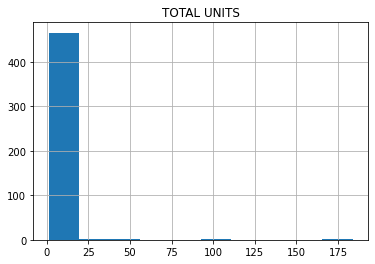

In [22]:
data14.hist()

#### - Data Tahun 2015

In [23]:
data15=brooklyn2015[['TOTAL UNITS']]
data15

,TOTAL UNITS
25521,3
25540,1
26929,2
27255,1
27256,1
...,...
48174,1
48314,15
48692,1
48693,1


array([[<AxesSubplot:title={'center':'TOTAL UNITS'}>]], dtype=object)

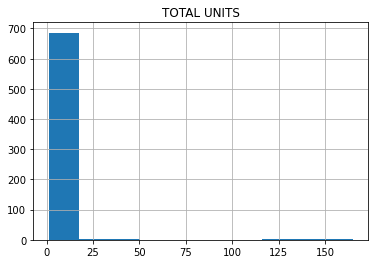

In [24]:
data15.hist()

Berdasarkan hasil plot kedua data, unit yang terjual tahun 2014 dan tahun 2015 di Kota Brooklin, tampak bahwa histogram tidak simetris. Maka dapat disimpulkan bahwa data unit yang terjual pada tahun 2014 dan 2015 tidak terdistribusi dengan normal.

Dengan demikian, maka uji statistik yang digunakan adalah statistik non-parametrik.
Dalam hal ini akan digunakan jenis statistik Kolmogorov-Smirnov dan Saphiro-Wilk

Ketentuan :
Jika pvalue > 0,5 maka Ho ditolak
jika pvalue < 0,5 maka Ho diterima

---------------------------------------

## 3. Uji Statistik

In [25]:
# import package jenis statistik non-paremtris -> kolmogoroc-smirnov dan saphiro wilk

from scipy.stats import kstest, shapiro

In [26]:
nilai_kolmogorov=kstest(data15['TOTAL UNITS'], 'norm')
nilai_saphiro=shapiro(data15['TOTAL UNITS'])
print('KS =' , nilai_kolmogorov)
print('SW =', nilai_saphiro)

KS = KstestResult(statistic=0.8413447460685429, pvalue=0.0)
SW = ShapiroResult(statistic=0.07708144187927246, pvalue=0.0)


####
####

#### Uji Koolmogorof-Smirnov diperoleh pvalue < 0,5
#### Uji Saphiro-Wilk diperoleh pvalue < 0,5

#### maka,

#### Ho diterima

####
## Kesimpulan :

## Tidak ada perbedaan unit yang terjual antara tahun 2014 dan tahun 2015 di Kota Brooklyn

-----------------------------------